In [1]:
import pandas as pd
import os.path
from pathlib import Path
df_pubs = pd.read_csv('savedrecs_20221012.txt',sep=',',header=2)
NumRecord = df_pubs.shape[0]
NumRecord

66

In [2]:
from datetime import datetime
currentYear = datetime.now().year
currentYear

2022

In [3]:
import numpy as np
import matplotlib.pyplot as plt

years = range(2005,currentYear+1)

CiteNumTotal = np.zeros(NumRecord).astype(int)
for year in years:
    CiteNumYear = df_pubs[str(year)].values
    CiteNumTotal += CiteNumYear
    df_pubs[str(year)+'_cusum'] = CiteNumTotal
    pass
print( CiteNumTotal )
CiteNumTotalMax = np.max(CiteNumTotal)
CiteNumTotalMax

[109  84  71  61  45  39  34  35  34  31  29  29  28  28  27  24  23  22
  22  22  20  20  19  18  18  16  15  14  13  12  12  12  11  11  10   9
   9   8   8   7   7   6   6   6   4   4   4   3   3   3   3   2   2   2
   2   1   1   1   1   1   0   0   0   0   0   0]


109

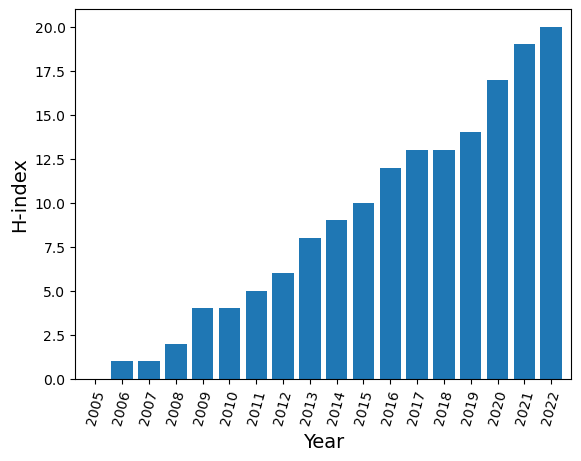

In [4]:
Hindex = []
for year in years[:]:
    H = 0
    CiteNum = df_pubs[str(year)+'_cusum'].values
    while np.sum(CiteNum>=(H+1))>(H+1):
        H += 1
        pass
    Hindex.append(H)
    pass
Hindex = np.array(Hindex)


fig = plt.figure()
ax= fig.add_subplot(111)
ax.bar(years,height=Hindex)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('H-index', fontsize=14);
ax.set_xticks(years)
ax.set_xticklabels(years,rotation=75);
ax.set_xlim([years[0]-0.75,years[-1]+0.75]);